In [43]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from numpy import sort
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [44]:
election_data=pd.read_csv('/Users/lutz/Documents/german_federal_elections/output/second_votes_data.csv')
struc_data=pd.read_csv('/Users/lutz/Documents/german_federal_elections/output/structural_data.csv')
struc_data.drop(columns=['Unnamed: 0'], inplace=True, axis=0)
election_data.drop(columns=['Unnamed: 0'], inplace=True, axis=0)
#struc_data['SPD_Second_Votes_Final']=election_data['SPD_Second_Votes_Final']
#struc_data['AFD_Second_Votes_Final']=election_data['AfD_Second_Votes_Final']


In [45]:
election_data=election_data.iloc[:,7:].fillna(0)
election_data['CDU/CSU_Second_Votes_Final']=election_data['CDU_Second_Votes_Final']+election_data['CSU_Second_Votes_Final']
election_data.drop(columns=['CDU_Second_Votes_Final','CSU_Second_Votes_Final'], inplace=True, axis=0)

election_data

,SPD_Second_Votes_Final,AfD_Second_Votes_Final,FDP_Second_Votes_Final,Left_Second_Votes_Final,Greens_Second_Votes_Final,FW_Second_Votes_Final,CDU/CSU_Second_Votes_Final
0,25.476837,5.775787,10.742617,4.184745,18.642407,0.960112,20.389643
1,26.311006,6.103576,12.730237,3.078150,15.670332,0.749939,24.635610
2,27.731683,8.365838,13.686727,3.348408,14.238134,1.267865,24.307781
3,26.807493,6.563325,12.004598,3.207729,17.910596,0.729396,23.930291
4,26.013104,4.935899,10.388991,6.081203,28.432043,0.615214,15.425491
...,...,...,...,...,...,...,...
294,19.566427,12.067526,16.991358,2.592647,11.354182,1.916654,28.806211
295,38.111679,9.258653,11.701810,9.598929,0.000000,1.559719,20.499879
296,36.422040,10.014781,12.075839,6.726432,0.000000,2.121206,24.369877
297,37.384698,9.416779,10.885049,5.755590,0.000000,2.102429,26.452216


In [63]:
struc_data.iloc[:,7:]

,Foreign_Population_Perc,Population_Density (IH per km2),Birth_Balance_Perc,Migration_Balance_Perc,Age_Under_18_Perc,Age_18_24_Perc,Age_25_34_Perc,Age_35_59_Perc,Age_60_74_Perc,Age_75_Up_Perc,...,Employees_Service_Perc,Employees_Other_Perc,SGB_II_Recipients_Total_Perc,SGB_II_Non_Employable_Perc,SGB_II_Foreigner_Perc,Unemployment_Rate_Total,Unemployment_Rate_Men,Unemployment_Rate_Women,Unemployment_Rate_Age_15_24,Unemployment_Rate_Age_55_64
0,8.4,137.1,-0.27,0.95,16.6,8.4,12.0,33.6,17.6,11.9,...,15.4,36.7,7.68,26.1,28.2,7.0,7.7,6.2,5.9,7.6
1,7.1,84.6,-0.52,0.83,15.6,7.7,11.0,34.0,18.9,12.8,...,11.8,32.7,5.91,26.1,23.8,6.5,6.9,5.9,5.4,7.2
2,6.5,110.5,-0.53,0.46,16.3,7.2,10.5,35.7,18.2,12.2,...,15.1,32.0,7.06,26.3,29.3,6.4,6.8,6.1,7.0,6.4
3,5.5,116.4,-0.38,0.86,16.9,7.0,9.9,35.9,18.3,12.0,...,17.0,33.9,5.28,29.6,33.2,4.8,5.2,4.3,4.7,5.2
4,11.4,1879.2,-0.08,-0.18,14.9,10.6,17.2,32.1,14.6,10.5,...,24.8,38.9,12.52,26.8,35.1,8.4,9.2,7.4,5.1,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,12.3,150.2,-0.21,0.34,16.7,7.9,12.1,34.5,17.3,11.6,...,9.0,24.0,2.76,25.5,31.0,4.1,4.2,3.9,3.9,4.8
295,16.4,833.3,-0.40,0.20,15.0,8.3,13.9,32.8,18.4,11.7,...,25.1,32.6,13.18,26.9,42.6,10.3,11.4,9.2,8.1,9.2
296,10.9,293.8,-0.58,0.21,15.0,6.7,11.3,34.8,20.0,12.2,...,13.8,25.9,5.50,26.3,40.4,5.7,6.2,5.0,3.7,5.9
297,6.5,265.1,-0.65,0.27,14.2,6.4,10.9,34.9,20.6,12.9,...,14.6,30.6,6.96,27.6,40.6,6.3,6.7,5.8,5.3,6.1


In [78]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 4, 6, 8, 10],
    'colsample_bytree': [0.3, 0.5, 0.7, 0.9, 1],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1],
    'gamma': [0, 0.5, 1],
    'reg_alpha': [0, 0.5, 1],
    'reg_lambda': [1, 1.5, 2],
}



In [88]:


model_dict={}
for i in election_data.columns:
    party_dict={}
    X=struc_data.iloc[:,7:]
    y=election_data[i]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    party_dict['X']=X
    party_dict['y']=y
    party_dict['X_train']=X_train
    party_dict['X_test']=X_test
    party_dict['y_train']=y_train
    party_dict['y_test']=y_test
    
    cv=5
    print(f"starting GridSearch for XGBoost with {str(cv)}-fold cross validation for party {i}")
    model = xgb.XGBRegressor()
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for model for party {i}: {grid_search.best_params_}')
    best_model = grid_search.best_estimator_
    best_model.set_params(early_stopping_rounds=10)

    preds = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f"RMSE for {i}: {rmse}")
    
    party_dict['best_model']=best_model
    party_dict['preds']=preds
    party_dict['RMSE']=rmse
    results = best_model.evals_result()
    
    
    model_dict[i]=party_dict





starting GridSearch for XGBoost with 5-fold cross validation for party SPD_Second_Votes_Final
Best parameters for model for party SPD_Second_Votes_Final: {'colsample_bytree': 0.5, 'gamma': 0.5, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.4}
RMSE for SPD_Second_Votes_Final: 2.755666266936992


XGBoostError: No evaluation result, `eval_set` is not used during training.

In [ ]:
results

In [66]:
import pickle

with open('model_dict_run_2.pkl', 'wb') as f:
    pickle.dump(model_dict, f)


RMSE for SPD_Second_Votes_Final: 2.8319545326655025


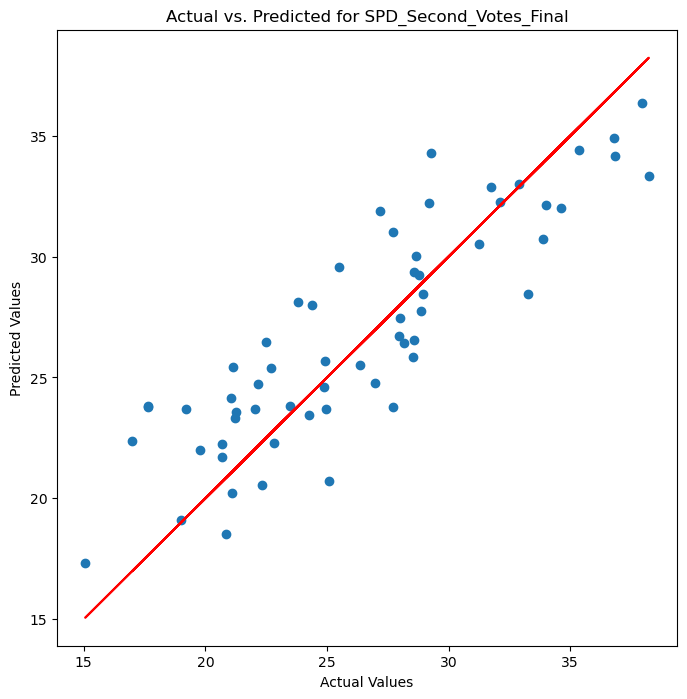

RMSE for AfD_Second_Votes_Final: 2.261756581294478


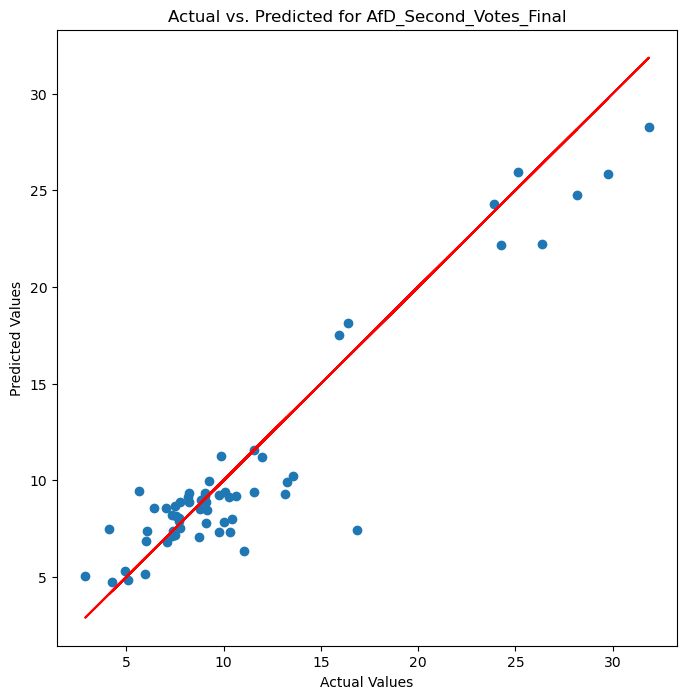

RMSE for FDP_Second_Votes_Final: 1.1540209445536802


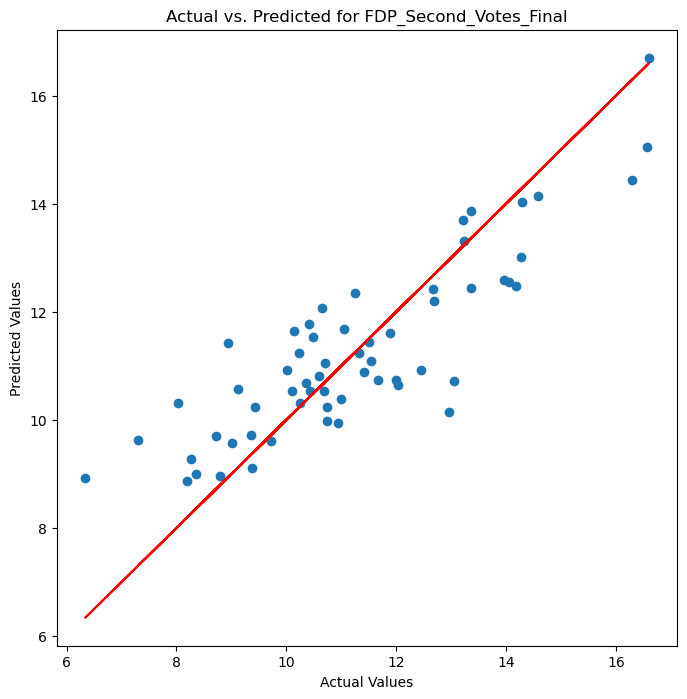

RMSE for Left_Second_Votes_Final: 1.8977851026424237


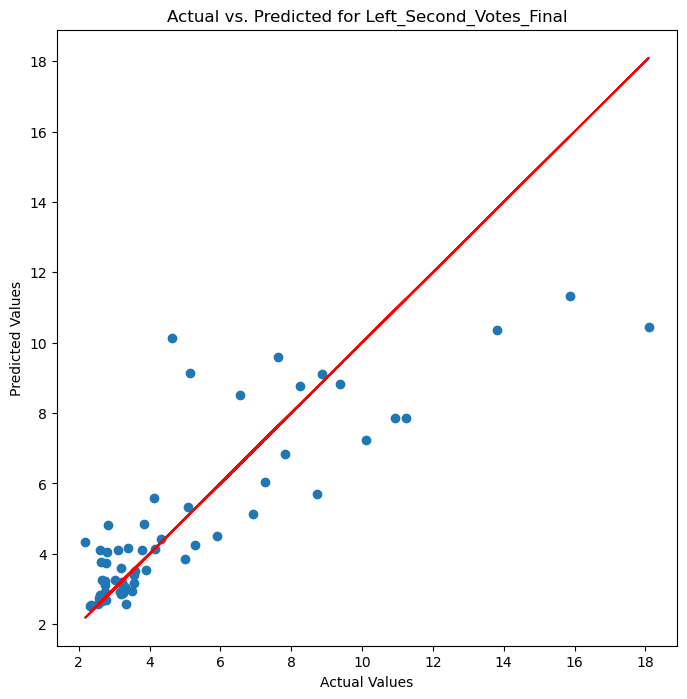

RMSE for Greens_Second_Votes_Final: 3.7028833917189536


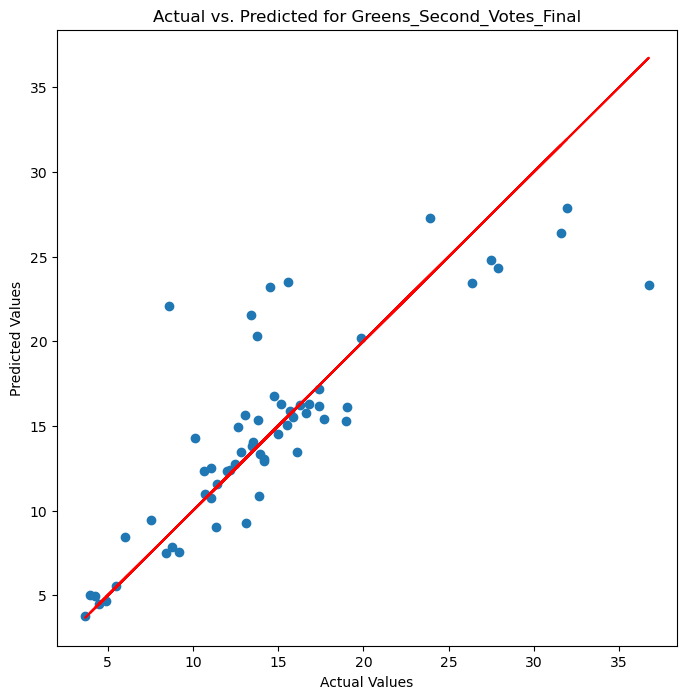

RMSE for FW_Second_Votes_Final: 0.4986799533317091


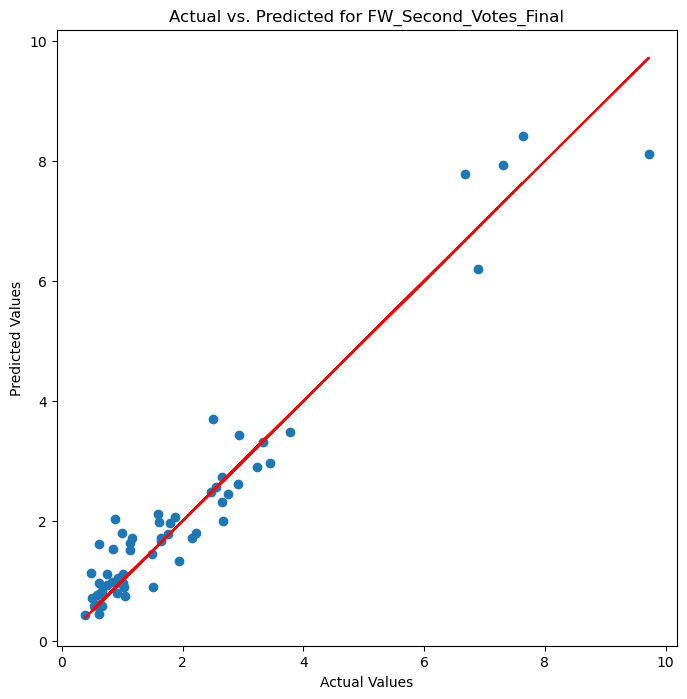

RMSE for CDU/CSU_Second_Votes_Final: 3.342300827683436


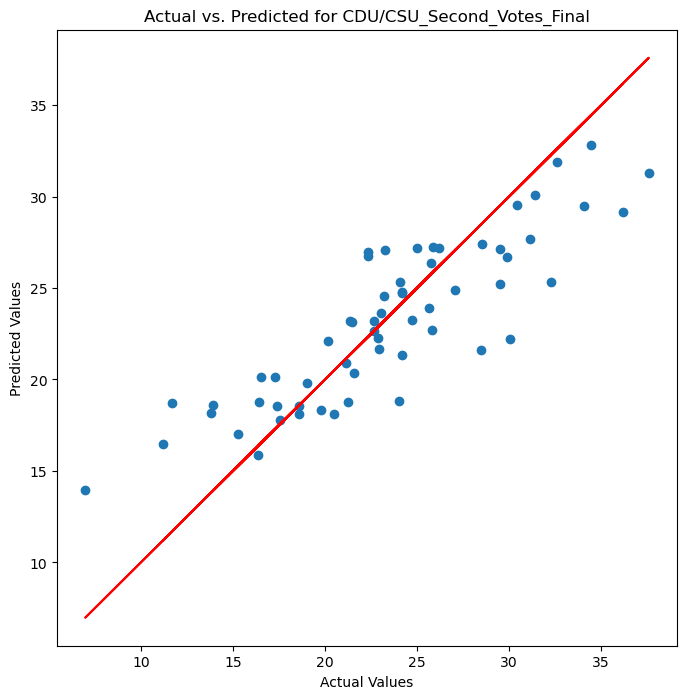

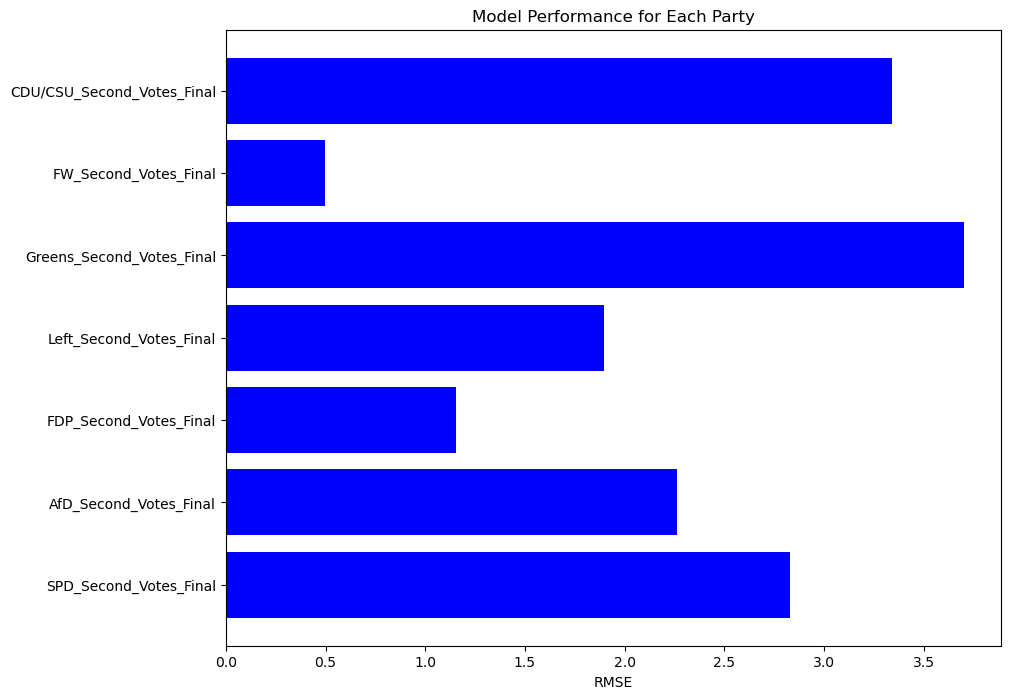

In [72]:
import matplotlib.pyplot as plt

# For people with ML background
for party, party_dict in model_dict.items():
    print(f"RMSE for {party}: {party_dict['RMSE']}")
    plt.figure(figsize=(8, 8))
    plt.scatter(party_dict['y_test'], party_dict['preds'])
    plt.plot(party_dict['y_test'], party_dict['y_test'], color='red') # y=x line
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs. Predicted for {party}')
    plt.show()

# For people with political background
rmse_values = [party_dict['RMSE'] for party, party_dict in model_dict.items()]
parties = [party for party, party_dict in model_dict.items()]

plt.figure(figsize=(10, 8))
plt.barh(parties, rmse_values, color='blue')
plt.xlabel('RMSE')
plt.title('Model Performance for Each Party')
plt.show()


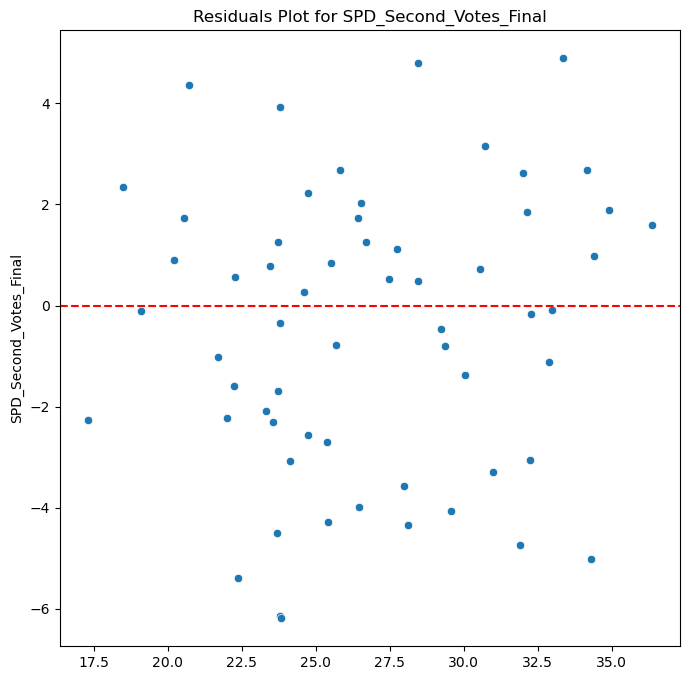

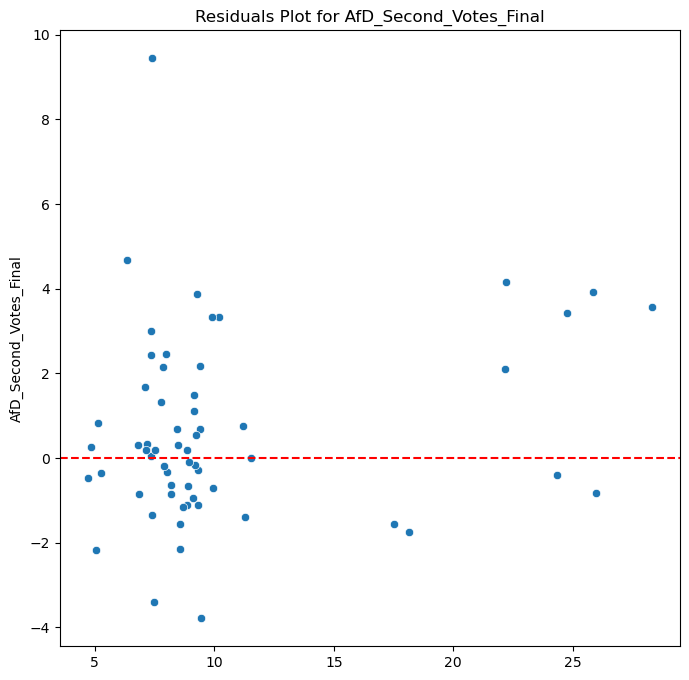

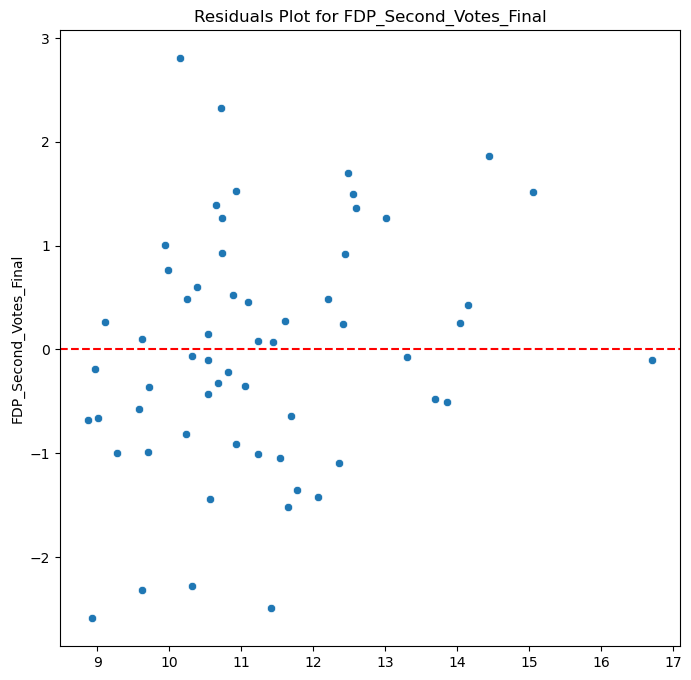

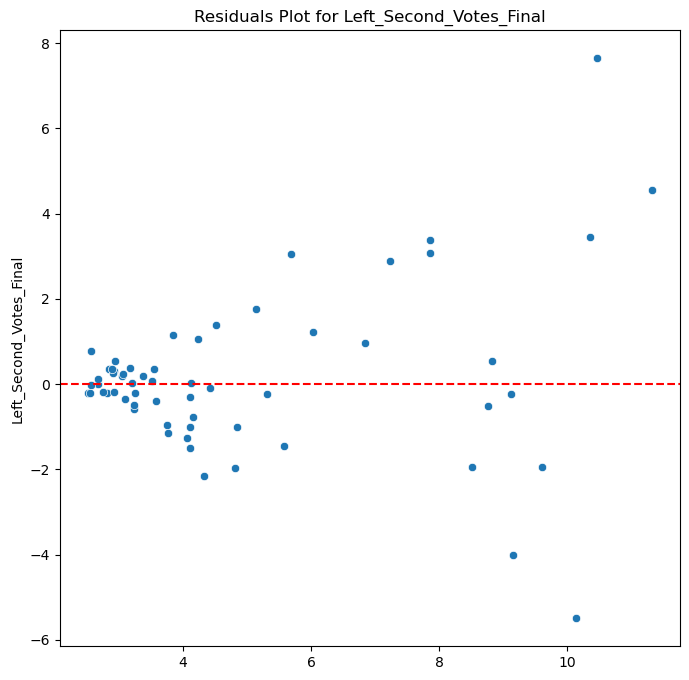

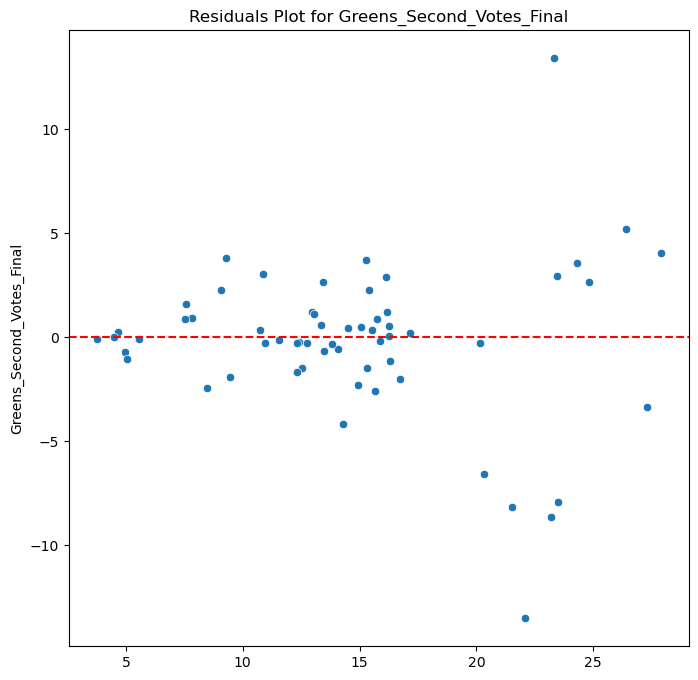

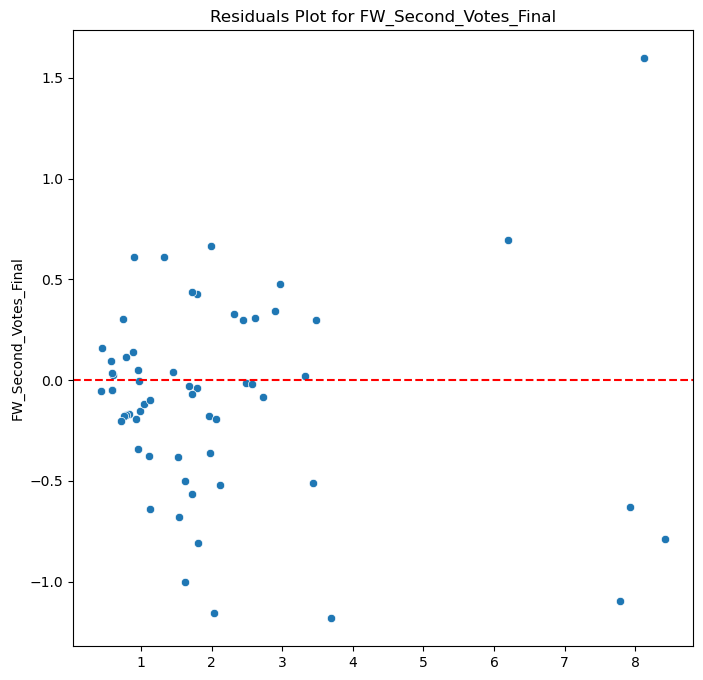

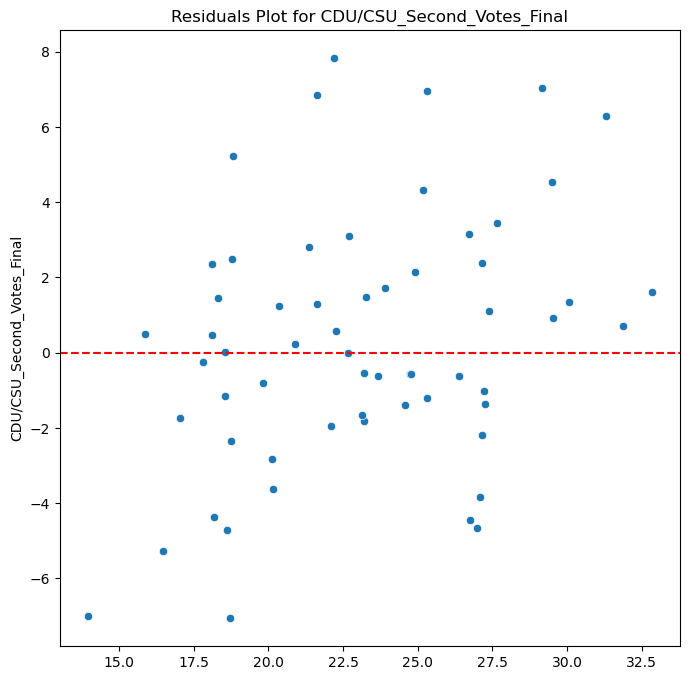

In [73]:
import seaborn as sns

for party, party_dict in model_dict.items():
    residuals = party_dict['y_test'] - party_dict['preds']
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=party_dict['preds'], y=residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuals Plot for {party}')
    plt.show()


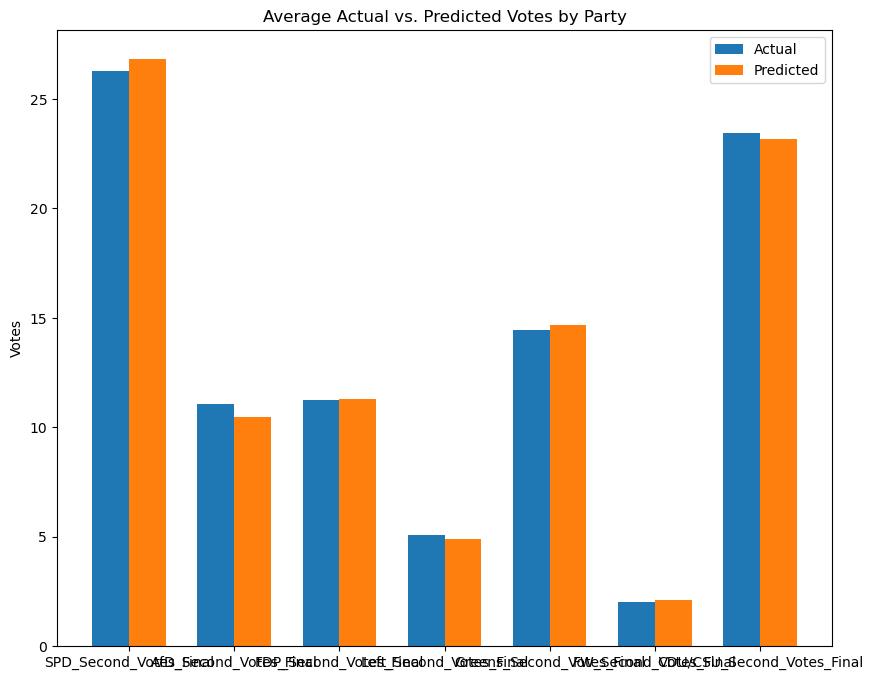

In [74]:
avg_actuals = []
avg_preds = []

for party, party_dict in model_dict.items():
    avg_actuals.append(party_dict['y_test'].mean())
    avg_preds.append(party_dict['preds'].mean())

ind = np.arange(len(avg_actuals))
width = 0.35

plt.figure(figsize=(10, 8))
plt.bar(ind - width/2, avg_actuals, width, label='Actual')
plt.bar(ind + width/2, avg_preds, width, label='Predicted')

plt.ylabel('Votes')
plt.title('Average Actual vs. Predicted Votes by Party')
plt.xticks(ind, parties)
plt.legend(loc='best')
plt.show()


In [71]:
for i in model_dict:
    #print(i)
    model=model_dict[i]['best_model']
    y_test=model_dict[i]['y_test']
    y_pred=model_dict[i]['preds']
    plot_ml_visualizations(y_test, y_pred, model)

ValueError: continuous is not supported

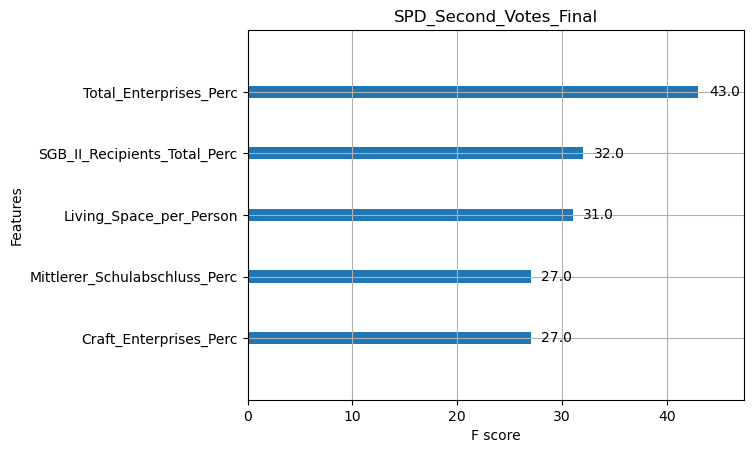

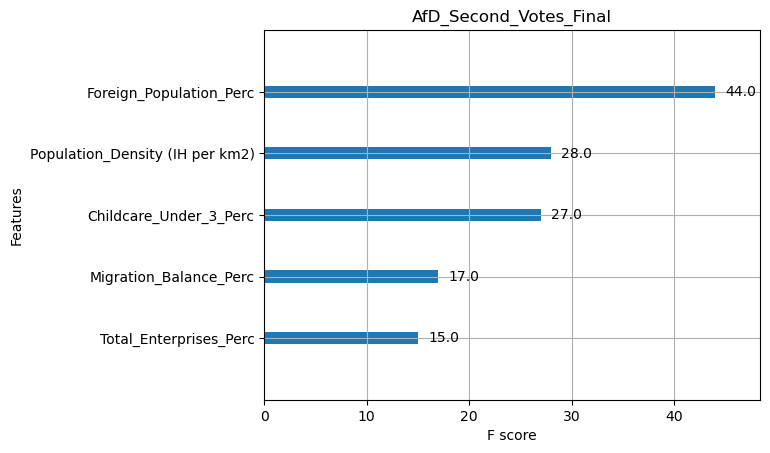

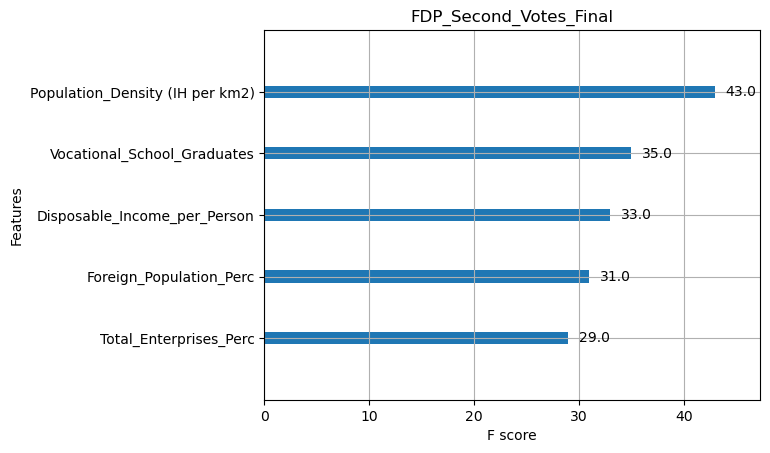

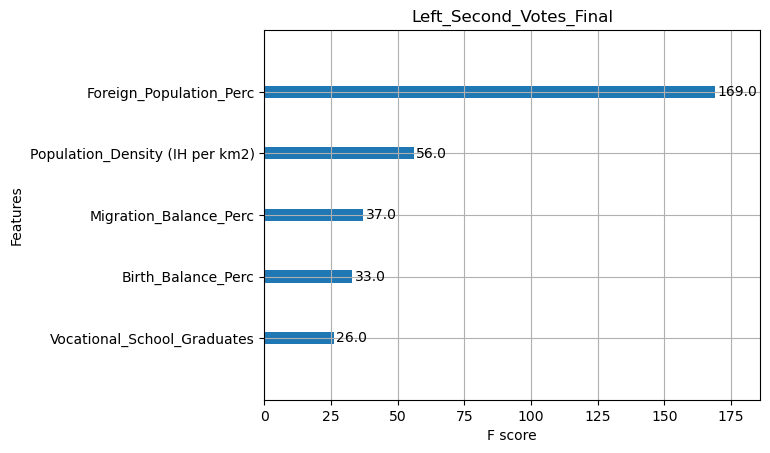

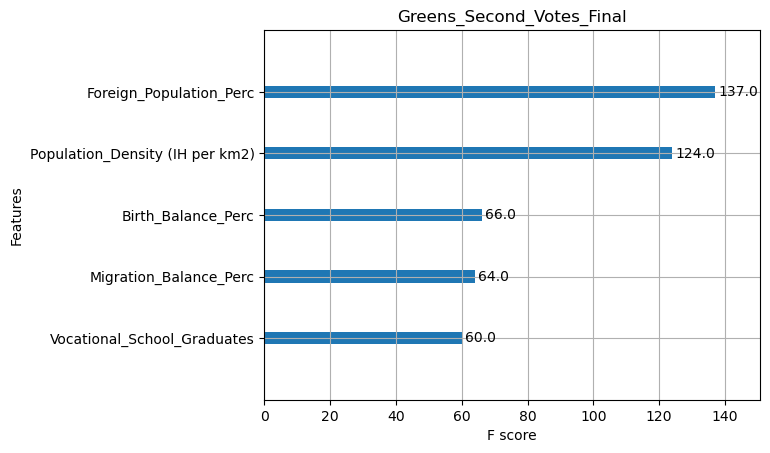

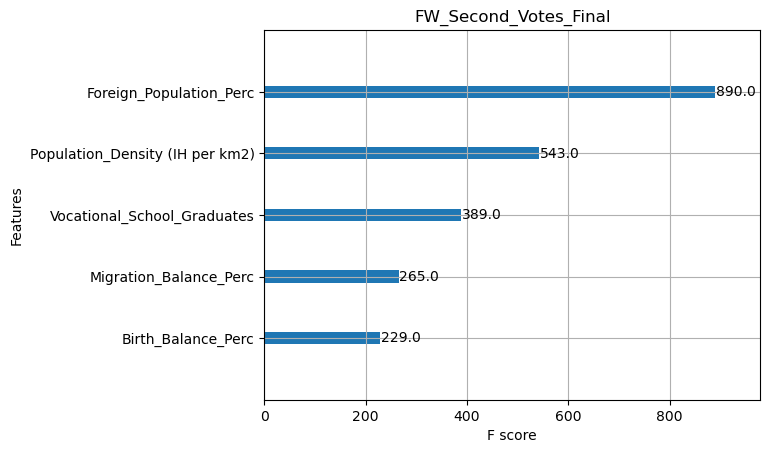

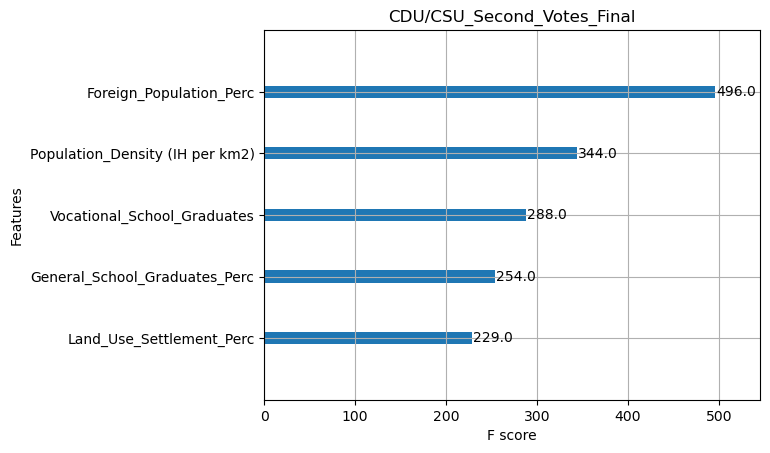

In [67]:
for i in model_dict:
    #print(i)
    bm=model_dict[i]['best_model']
    plot_importance(bm, max_num_features=5)
    ax=plt.gca()
    ax.set_title(i)
    plt.show()
    

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


# Assuming model is your trained XGBoost model
plot_importance(model)
plt.show()

In [33]:
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

model.fit(X_train, y_train)

preds = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5.929080


In [22]:
thresholds = sort(model.feature_importances_)
thresholds

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00073683, 0.0008339 , 0.0012138 ,
       0.00226908, 0.00415007, 0.00614185, 0.00915043, 0.00950665,
       0.00983617, 0.01293325, 0.01718627, 0.02014249, 0.02092888,
       0.03037795, 0.03331939, 0.04009138, 0.04785756, 0.06121114,
       0.18747841, 0.20502101, 0.27961347], dtype=float32)

In [23]:


# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgb.XGBRegressor()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print("Thresh=%.3f, n=%d, RMSE: %.2f" % (thresh, select_X_train.shape[1], rmse))


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.000, n=48, RMSE: 2.74
Thresh=0.001, n=21, RMSE: 3.04


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.001, n=20, RMSE: 3.06
Thresh=0.001, n=19, RMSE: 2.91
Thresh=0.002, n=18, RMSE: 2.94


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.004, n=17, RMSE: 3.38
Thresh=0.006, n=16, RMSE: 3.28
Thresh=0.009, n=15, RMSE: 3.48


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.010, n=14, RMSE: 3.02
Thresh=0.010, n=13, RMSE: 2.98
Thresh=0.013, n=12, RMSE: 3.08


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.017, n=11, RMSE: 3.21
Thresh=0.020, n=10, RMSE: 3.14
Thresh=0.021, n=9, RMSE: 3.19


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.030, n=8, RMSE: 3.06
Thresh=0.033, n=7, RMSE: 3.27
Thresh=0.040, n=6, RMSE: 3.79


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature nam

Thresh=0.048, n=5, RMSE: 3.99
Thresh=0.061, n=4, RMSE: 3.56
Thresh=0.187, n=3, RMSE: 3.78
Thresh=0.205, n=2, RMSE: 4.31
Thresh=0.280, n=1, RMSE: 5.98


/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/Users/lutz/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

# Assuming rmse_values and n_features are lists containing your RMSE values and the corresponding number of features
plt.figure(figsize=(10, 5))
plt.plot(n_features, rmse_values, marker='o')
plt.title('Model Performance')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.show()


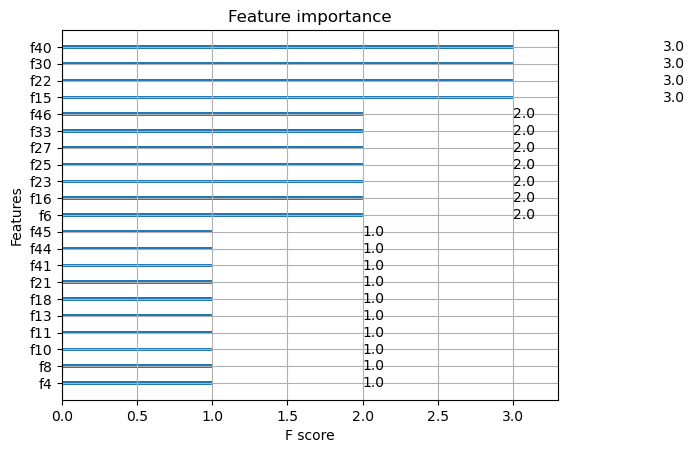

In [19]:
from xgboost import plot_importance
import matplotlib.pyplot as plt


# Assuming model is your trained XGBoost model
plot_importance(model)
plt.show()


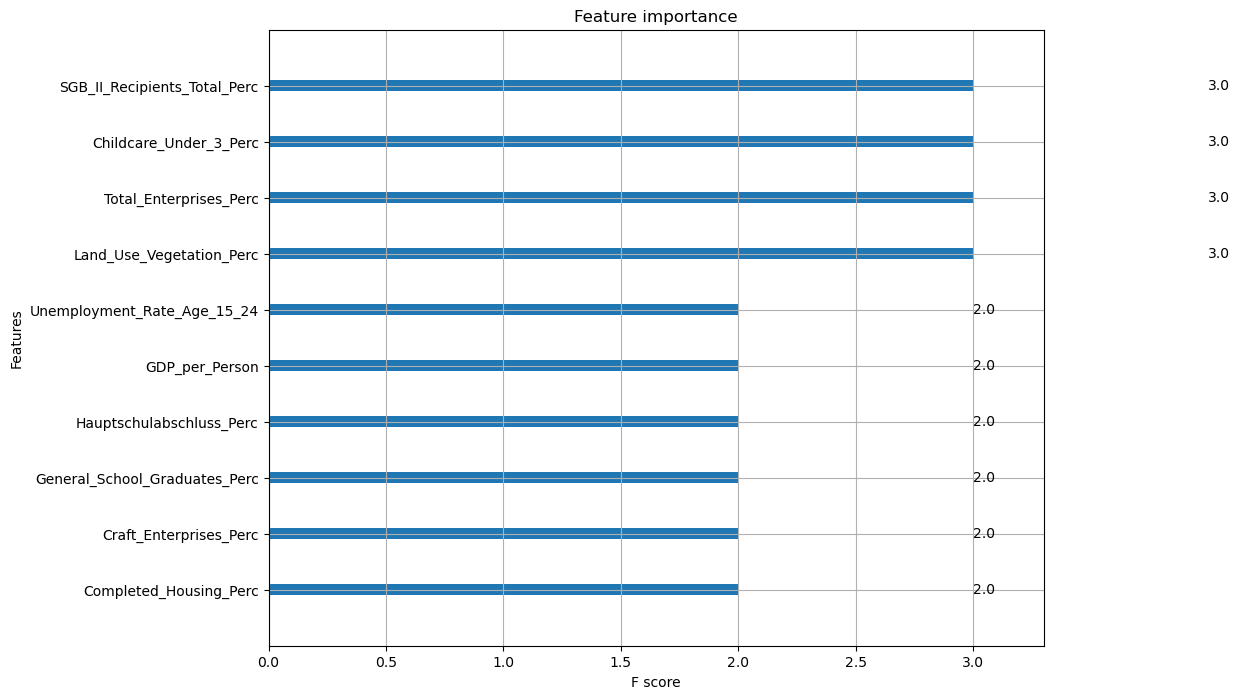

In [24]:
ax = plot_importance(model, max_num_features=10)  # only show top 10 features
ax.figure.set_size_inches(10, 8)
plt.show()

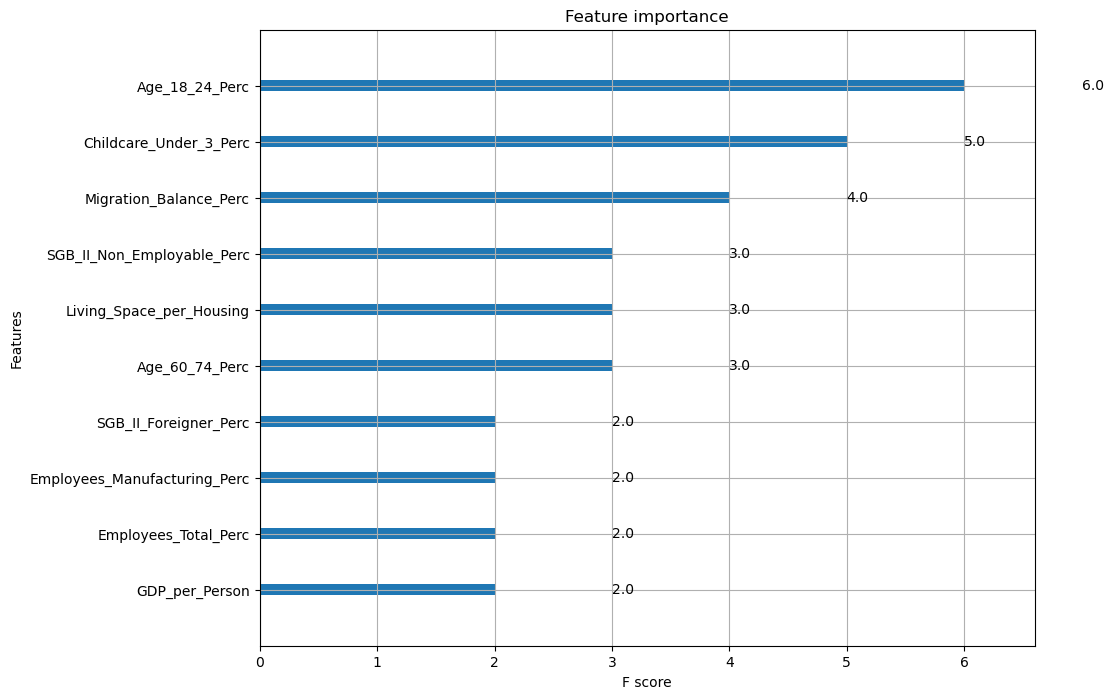

In [34]:
ax = plot_importance(model, max_num_features=10)  # only show top 10 features
ax.figure.set_size_inches(10, 8)
plt.show()